# Q.4 Linear Regression Model

For this question, we will use the linear regression model as we are to predict a continuous value given set of independent variables. The data is based on historical stock prices where we have continuous stock price as our target variable with market indicators such as; trading volume, price to earnings ratio and economic indicators to predict the future stock prices.


# Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os
from matplotlib.dates import DateFormatter

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

# Data Exploration

In [4]:
# Read our data
df = pd.read_csv('StockMarketDataset.csv')

In [5]:
# Display first few rows
df.head(10)

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,07/17/2023,$193.99,50520160,$191.90,$194.32,$191.81
1,AAPL,07/14/2023,$190.69,41616240,$190.23,$191.1799,$189.63
2,AAPL,07/13/2023,$190.54,41342340,$190.50,$191.19,$189.78
3,AAPL,07-12-2023,$189.77,60750250,$189.68,$191.70,$188.47
4,AAPL,07-11-2023,$188.08,46638120,$189.16,$189.30,$186.60
5,AAPL,07-10-2023,$188.61,59922160,$189.26,$189.99,$187.035
6,AAPL,07-07-2023,$190.68,46815000,$191.41,$192.67,$190.24
7,AAPL,07-06-2023,$191.81,45156010,$189.84,$192.02,$189.20
8,AAPL,07-05-2023,$191.33,46920260,$191.565,$192.98,$190.62
9,AAPL,07-03-2023,$192.46,31346600,$193.78,$193.88,$191.76


In [4]:
# Summary Statistics
df.describe()

,Volume
count,2.516000e+04
mean,5.131764e+07
std,6.399143e+07
min,1.143952e+06
25%,1.200394e+07
50%,2.672083e+07
75%,6.857269e+07
max,1.065209e+09


In [5]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25160 entries, 0 to 25159
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Company     25160 non-null  object
 1   Date        25160 non-null  object
 2   Close/Last  25160 non-null  object
 3   Volume      25160 non-null  int64 
 4   Open        25160 non-null  object
 5   High        25160 non-null  object
 6   Low         25160 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


# Finding Missing Value

In [6]:
df.isnull()

,Company,Date,Close/Last,Volume,Open,High,Low
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
25155,False,False,False,False,False,False,False
25156,False,False,False,False,False,False,False
25157,False,False,False,False,False,False,False
25158,False,False,False,False,False,False,False


# Data Visualization

# Time Series Chart for AAPL

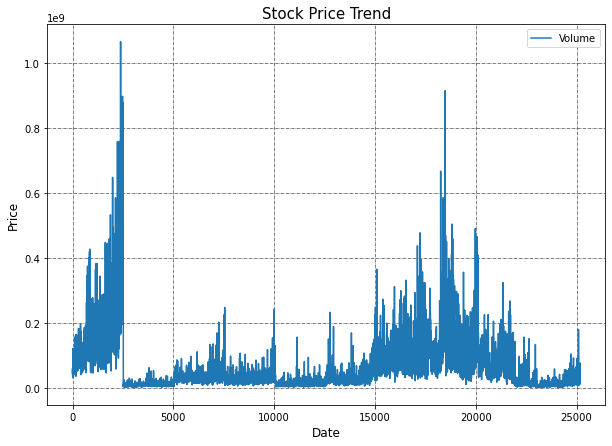

In [8]:
df.plot(figsize=(10, 7))
plt.title("Stock Price Trend", fontsize=15)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Date', fontsize=12)
date_form = DateFormatter("%y%m-%d")
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [6]:
df.head()

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,07/17/2023,$193.99,50520160,$191.90,$194.32,$191.81
1,AAPL,07/14/2023,$190.69,41616240,$190.23,$191.1799,$189.63
2,AAPL,07/13/2023,$190.54,41342340,$190.50,$191.19,$189.78
3,AAPL,07-12-2023,$189.77,60750250,$189.68,$191.70,$188.47
4,AAPL,07-11-2023,$188.08,46638120,$189.16,$189.30,$186.60


# Visualization


<AxesSubplot:xlabel='Volume', ylabel='Density'>

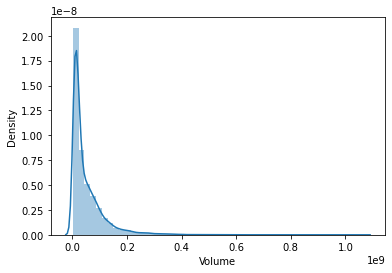

In [9]:
sns.distplot(df['Volume'])

<AxesSubplot:>

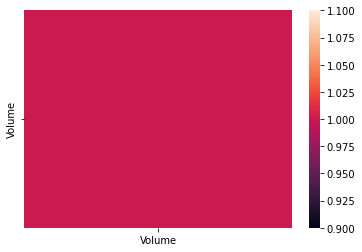

In [10]:
sns.heatmap(df.corr())

In [11]:
plt.scatter(df)

TypeError: scatter() missing 1 required positional argument: 'y'

In [30]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,07/17/2023,$193.99,50520160,$191.90,$194.32,$191.81
1,07/14/2023,$190.69,41616240,$190.23,$191.1799,$189.63
2,07/13/2023,$190.54,41342340,$190.50,$191.19,$189.78
3,07-12-2023,$189.77,60750250,$189.68,$191.70,$188.47
4,07-11-2023,$188.08,46638120,$189.16,$189.30,$186.60


In [84]:
new_dta=df.drop(columns=['Date'], axis=1)

In [86]:
new_dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25160 entries, 0 to 25159
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Close/Last  25160 non-null  object
 1   Volume      25160 non-null  int64 
 2   Open        25160 non-null  object
 3   High        25160 non-null  object
 4   Low         25160 non-null  object
dtypes: int64(1), object(4)
memory usage: 982.9+ KB


# Building the Linear Model

We Split our data into a training set and test set. We will use Close/Last price as our dependent variable y and the rest of our variables will serve as the independent variables x.


# Train Test Split

In [80]:
from sklearn.model_selection import train_test_split
X = new_dta.drop('Close/Last', axis=1)
y = ['Close/Last']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X = df[['Volume', 'Open', 'High', 'Low']]
y = df['Company'] 

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
LM = LinearRegression()

In [19]:
LM.fit(X, y, sample_weight=None)

ValueError: could not convert string to float: '$191.90'

# Training and Predicting

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
model = LinearRegression()
model.fit(X_train, y_train)


ValueError: could not convert string to float: '03-02-2022'

# Analysis of Data